In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy import stats

In [4]:
df = pd.read_csv('wildfires_clean.csv', index_col=0)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df.head()

,id,year,disc_date,disc_doy,cause_code,cause,size,size_class,lat,lon,state
0,1,2005,2005-02-02,33,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,2004,2004-05-12,133,1.0,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,2004,2004-05-31,152,5.0,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,2004,2004-06-28,180,1.0,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,2004,2004-06-28,180,1.0,Lightning,0.10,A,38.559167,-119.933056,CA


In [6]:
df.disc_date = pd.to_datetime(df.disc_date)

In [7]:
df.dtypes

id                     int64
year                   int64
disc_date     datetime64[ns]
disc_doy               int64
cause_code           float64
cause                 object
size                 float64
size_class            object
lat                  float64
lon                  float64
state                 object
dtype: object

## Are wildfires more dangerous in the summer?

### Two-tailed test

In [42]:
mean_acres = df.groupby(['season_div', 'year']).mean()['size_sqmt']

$H_0$ = The mean acres burned in summer is equal to the mean of acres burned in the rest of the year.

In [43]:
stats.ttest_ind(mean_acres.loc['summer',:], mean_acres.loc['rest_of_year',:], equal_var=False)

Ttest_indResult(statistic=5.542179622931899, pvalue=5.992742230101627e-06)

We can reject the null hypothesis.

### One-tailed test

$H_0$ = The mean acres burned in summer is less than or equal the mean of acres burned in the rest of the year.

In [44]:
stats.ttest_ind(mean_acres.loc['summer',:], mean_acres.loc['rest_of_year',:], equal_var=False)

Ttest_indResult(statistic=5.542179622931899, pvalue=5.992742230101627e-06)

We can reject the null hypothesis.

## Plot for presentation

In [34]:
df[df.season_div == 'summer'].groupby('year').mean()['size_sqmt']

year
1992    2.549452e+05
1993    1.728136e+05
1994    4.385940e+05
1995    2.085012e+05
1996    6.358496e+05
1997    3.362000e+05
1998    1.626580e+05
1999    4.920454e+05
2000    6.609466e+05
2001    3.647937e+05
2002    5.437420e+05
2003    4.193865e+05
2004    7.026990e+05
2005    8.775324e+05
2006    6.904246e+05
2007    8.987446e+05
2008    3.775247e+05
2009    5.065474e+05
2010    2.720933e+05
2011    3.415812e+05
2012    1.123133e+06
2013    4.735193e+05
2014    4.991272e+05
2015    1.267486e+06
Name: size_sqmt, dtype: float64

In [37]:
df_sqkm_summer = df[df.season_div == 'summer'].groupby('year').mean()['size_sqmt']/1000000

In [38]:
df_sqkm_roy = df[df.season_div == 'rest_of_year'].groupby('year').mean()['size_sqmt']/1000000

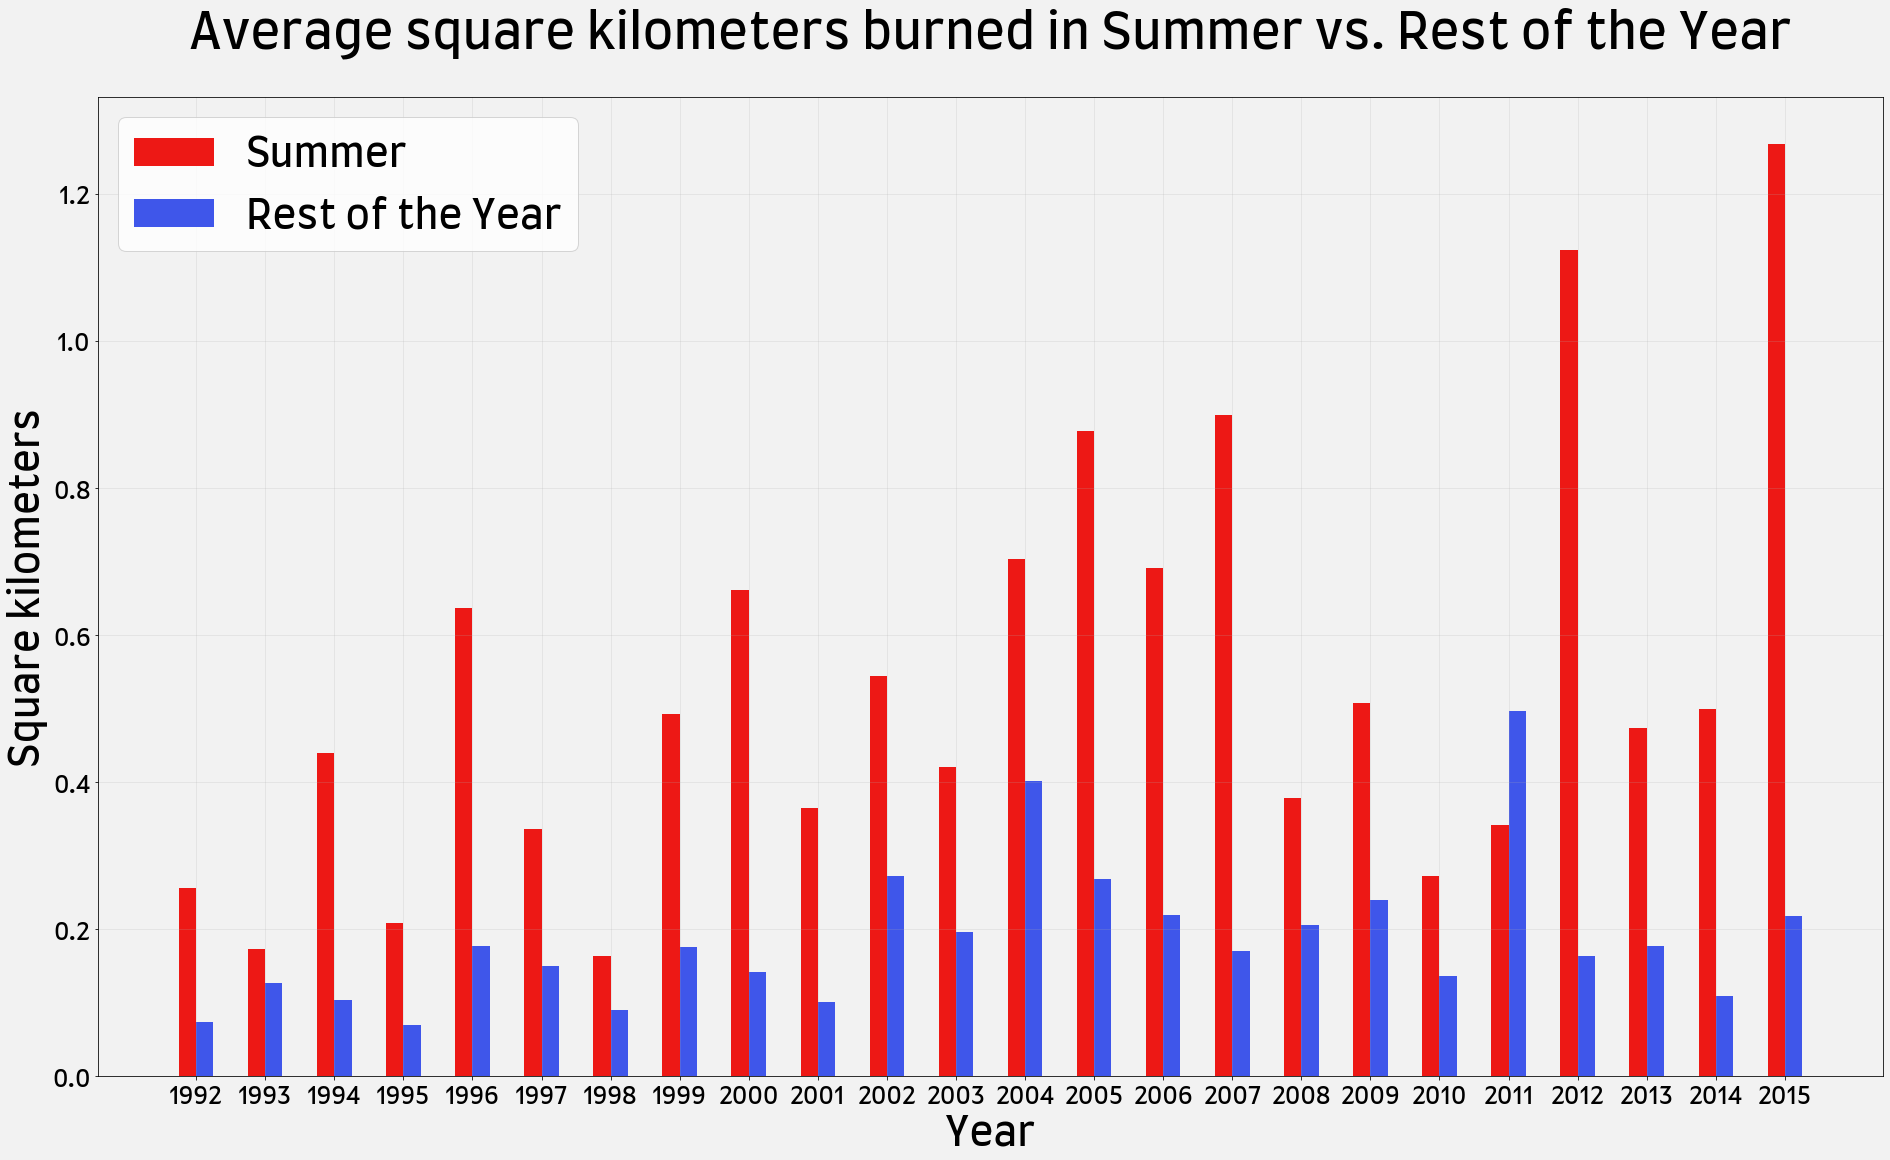

In [40]:
ind = np.arange(len(df_sqkm.index))
width = 0.25

fig, ax = plt.subplots(figsize=(32,18))
ax.bar(ind- width/2, df_sqkm, width,
       label='Summer', color='#ed1815')
ax.bar(ind + width/2, df_sqkm_roy, width,
       label='Rest of the Year', color='#3f56ea')
plt.title('Average square kilometers burned in Summer vs. Rest of the Year', fontsize=50, fontname='Farro', pad=50)
ax.grid(alpha=0.25)
ax.set_xlabel('Year', fontsize=40, fontname='Farro')
ax.set_ylabel('Square kilometers', fontsize=40, fontname='Farro')
ax.set_xticks(range(len(df.year.unique())))
ax.set_xticklabels(sorted(df.year.unique().tolist()), fontsize=25, fontname='Farro')
ax.legend(prop={'size': 40})
plt.yticks(fontsize=25)
ax.set_facecolor('#f2f2f2')
fig.set_facecolor('#f2f2f2')
plt.savefig('mean_sqkm_summer.png', facecolor=fig.get_facecolor(), bbox_inches='tight')


plt.show()

## Is the mean amount of acres burned related to the cause of the fire?

In [12]:
df.groupby('cause').mean()['size'].sort_values().index

Index(['Children', 'Debris Burning', 'Smoking', 'Railroad', 'Fireworks',
       'Arson', 'Miscellaneous', 'Campfire', 'Structure', 'Equipment Use',
       'Missing/Undefined', 'Powerline', 'Lightning'],
      dtype='object', name='cause')

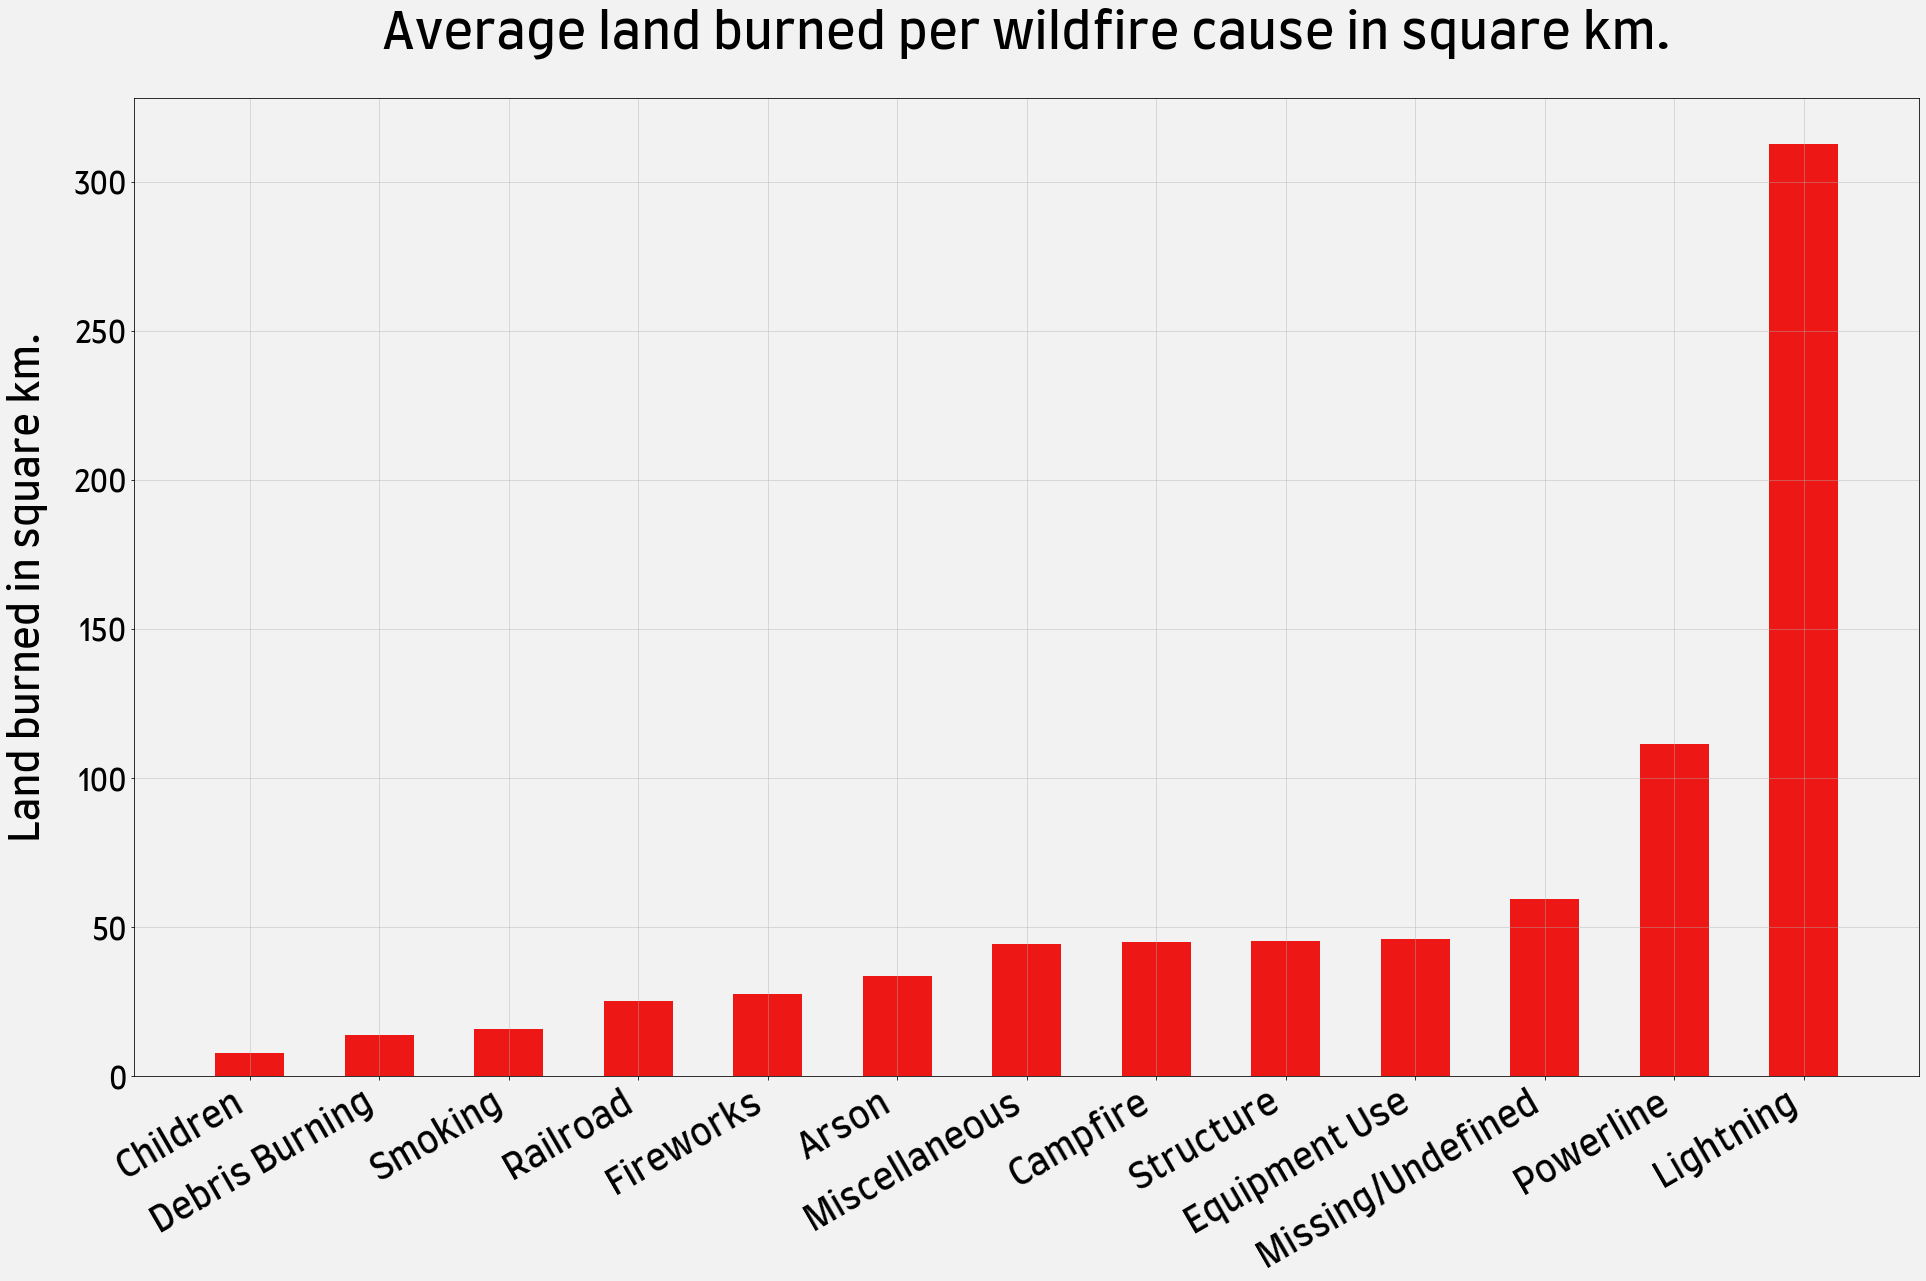

In [26]:
ind = np.arange(len(df.groupby('cause').mean()['size_sqmt']))
ind2 = ind*1.5
width = 0.25
fig, ax = plt.subplots(figsize=(32,18))

ax.bar(ind2, df.groupby('cause').mean()['size'].sort_values(), color='#ed1815')

ax.set_xticks(np.arange(len(df.cause.unique()))*1.5)
ax.set_xticklabels(df.groupby('cause').mean()['size'].sort_values().index, fontsize=35, fontname='Farro')

ax.set_ylabel('Land burned in square km.', fontsize=40, fontname='Farro', labelpad=25)

plt.title('Average land burned per wildfire cause in square km.', fontsize=50, fontname='Farro', pad=50)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.yticks(fontsize=30)
plt.grid(alpha=0.5)
ax.set_facecolor('#f2f2f2')
fig.set_facecolor('#f2f2f2')
plt.savefig('land_by_cause.png', facecolor=fig.get_facecolor(), bbox_inches='tight')
plt.show()

## Tendency over the years

In [ ]:
ax.hist(df.groupby('year').count()['id'], bins=sorted(df.year.unique().tolist()), color='#ed1815')
ax.set_xticks(df.year.unique().tolist())
ax.set_xticklabels(sorted(df.year.unique().tolist()), fontsize=35, fontname='Farro')

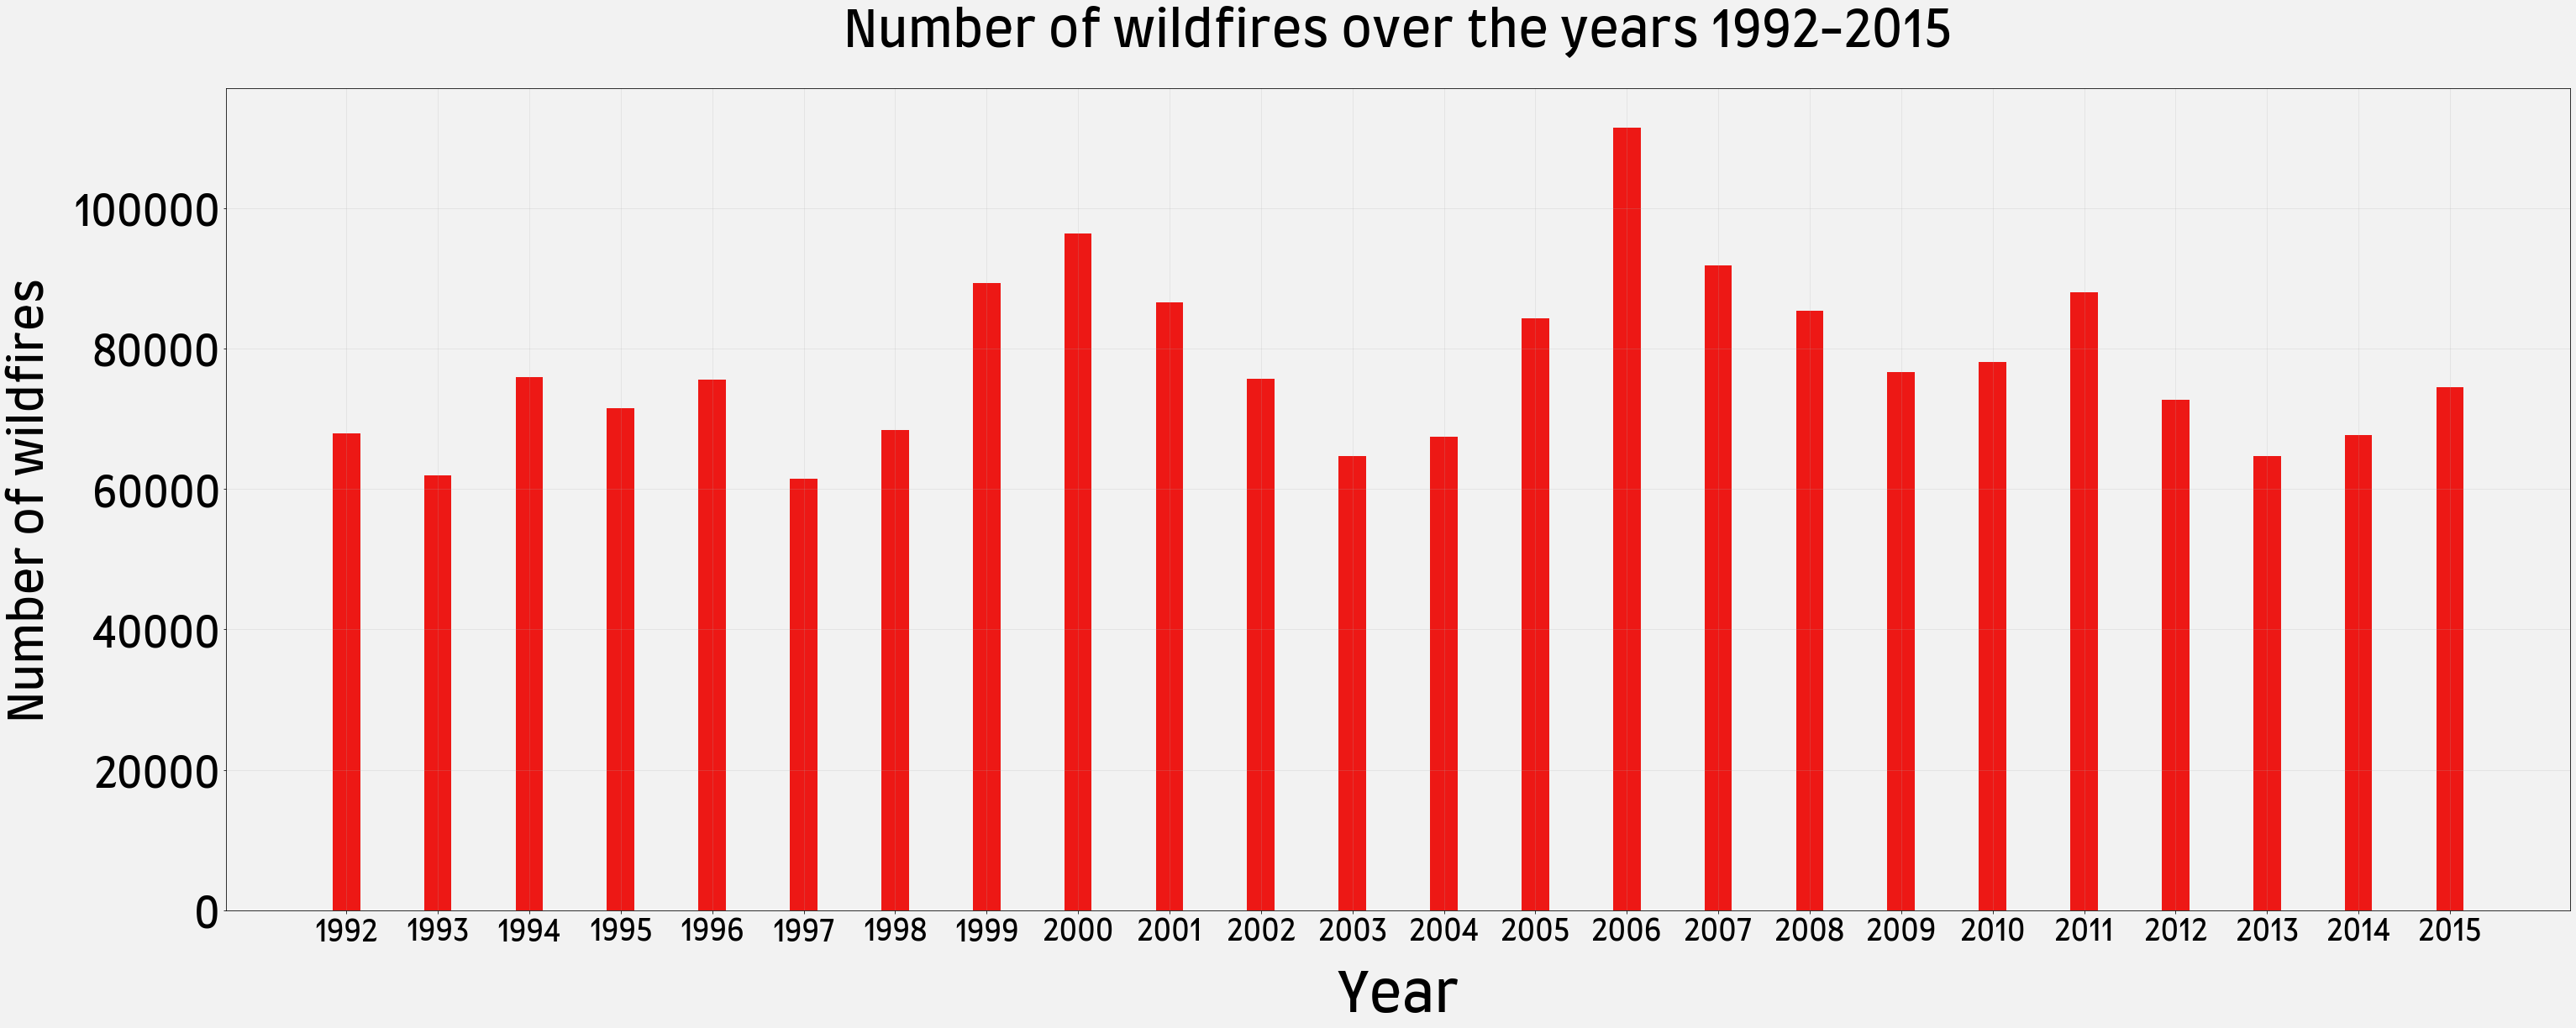

In [41]:
fig, ax = plt.subplots(figsize=(50,18))

ax.bar(df.groupby('year').count()['id'].index, df.groupby('year').count()['id'], 0.3, color='#ed1815')
ax.set_ylabel('Number of wildfires', fontsize=55, fontname='Farro', labelpad=25)
ax.set_xlabel('Year', fontsize=65, fontname='Farro', labelpad=25)
ax.set_xticklabels(sorted(df.year.unique().tolist()), fontsize=35, fontname='Farro')
ax.set_xticks(sorted(df.year.unique().tolist()))
plt.title('Number of wildfires over the years 1992-2015', fontsize=60, fontname='Farro', pad=50)
plt.yticks(fontsize=50)

plt.grid(alpha=0.25)
ax.set_facecolor('#f2f2f2')
fig.set_facecolor('#f2f2f2')
plt.savefig('number_of_wildfires.png', facecolor=fig.get_facecolor(), bbox_inches='tight')
plt.show()